<a href="https://colab.research.google.com/github/joncalle/AnalToolsDecMrk/blob/main/Lab_2_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group - 9

Danielle do Val Goncalves Tudeia - W0823569

Fernanda Barbieri de Camargo - W0825882

Jonathan Calle - W0825959

Jonathan Chukwuma Oteh - W0775057

# Lab 2 - Image preprocessing and using a fully connected neural network for image classification.

This lab will be done in two parts


> Indented block

*   Part 1 - Task 1 - 4
*   Part 2 - Task 5 & 6


---

In this lab, we will take our first steps toward running our code in the cloud. One of the simplest way to accomplish this is through Google's free (although, there is a paid Pro version) service, **Colab**.

This lab has 3 main tasks:

- **Task 1**: Get set up with Google Colab
- **Task 2**: Get the neural network you created in **Lab 1: Exercise 7** running without error in Google Colab
- **Task 3**: Preprocess images for use in Part 2 (20 Marks)
- **Task 4** **Viva** - Question will be based on Week 1 & 2 (Lectures & Labs) (10)

*** Viva will be conducted during Week 3 & 4 during yours Lab sessions**



In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Task 1

To use **Colab**, you need to have a Google account. To get a free Google account, go the the [sign up](https://accounts.google.com/) and fill in the necessary information. If you already have a Google account, you can skip this step. (If you have a gmail address, then you already have a Google Account.)

!

Once you have an account, you will need to sign in. To do this, go to [google.com](https://google.com):

<img src="images/google_signin.png" width=600 align="center">

After you are signed in, navigate to [Google Colab](https://colab.research.google.com).

<img src="images/colab_intro.png" width=600 align="center">

From here, click on **New Notebook**, give the notebook a name and then **save** it. Now you should verify the folder structure in **Google Drive**. To do this, you should navigate back to [google.com](https://google.com), and select **Drive** from the menu at the top right:

<img src="images/drive.png" width=600 align="center">

Once you are in your Google Drive, you should have a folder structure identical to the following (the name you gave your notebook can be different):
<img src="images/colab_notebook_save.png" width=600 align="center">

## Task 2

Following the procedure outlined in Lab 1, reproduce the code created in Exercise 7 in Google Colab. Verify that you get similar results using the same MNIST data that you used for Lab 1.

To upload the Lab 1 file (or any other file) to your Google Drive, simply click on the **New** button in the top left, and then selct **File upload**:

<img src="images/lab_upload.png" width=600 align="center">


### Extra Computational Power

One reason to use Google Colab is because it offers extra computational power in the form of access to GPUs for training larger models. As this is a free service, the extra compute resources come with some limitations (see Resource Limits section in the [FAQ](https://research.google.com/colaboratory/faq.html)). To access these extra compute resources, select the **Runtime** tab:

<img src="images/runtime_1.png" width=600 align="center">

Then select **Change runtime type**, choose **GPU** from the drop-down menu, and click **Save**:

<img src="images/runtime_2.png" width=600 align="center">

Now, when you run code in that notebook, it can run on GPUs instead of CPUs.

In [15]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

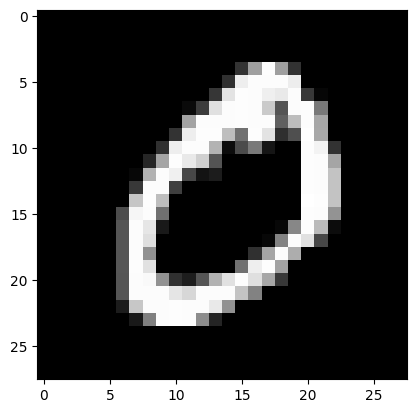

In [16]:
import matplotlib.pyplot as plt

plt.imshow(train_images[1], cmap='gray')

In [17]:
train_images = train_images.astype('float32') / 255
train_images = train_images.reshape((60000, 28 * 28))

test_images = test_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))

In [18]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

network8 = Sequential()
network8.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
network8.add(Dense(64, activation='sigmoid'))
network8.add(Dense(10, activation='softmax'))
network8.summary()
network8.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network8.fit(train_images, train_labels, epochs=8, batch_size=15, verbose=1)
test_loss4, test_acc8 = network8.evaluate(test_images, test_labels)
print('New test accuracy:', test_acc8)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 435402 (1.66 MB)
Trainable params: 435402 (1.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/8
4000/4000 [==============================] - 13s 3ms/step - loss: 0.2118 - accuracy: 0.9394
Epoch 2/8
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0864 - accuracy: 0.9743
Epoch 3/8
4000/4000 [==============================] - 12s 3ms/step - loss: 0.

## Task 3

The first step here is to upload the **Lego_small** data ([source](https://www.kaggle.com/joosthazelzet/lego-brick-images) that was provided with this notebook. (**Do not use the data from the *source* link.**) To do this, just upload the entire folder to your Google Drive. When you have done that you should have a folder structure that looks something like this:

<img src="images/lab_upload_lego.png" width=600 align="center">

To have access to the data in your Google Drive, you will need to run the following code to 'mount' your Drive so it is accessible to the notebook you are running on Google Colab. When you run the code, following the instructions so that your notebook can access the data.

In [20]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, you need to convert the images you just uploaded into a data structure similar to the MNIST data from Lab 1. The number of images and the pixel dimensions are, however, different than the MNIST data.

**The goal here is to get the data into the correct shape so that you can use it with a fully connected neural network.**

To accomplish this task, you will need to:
 - load the images from the various folders of the provided data
 - make sure they are grayscale and not RGB
 - convert the images to NumPy arrays
 - resize any images that are not the correct size
 - store these arrays in the proper shape in an appropriate data structure
 - create a target array to keep track of the proper class of each image in your data
 - view a few images after processing to verify that everything is working as it should
 - convert image arrays to one-dimensional and scale the pixel values so they are between 0 and 1
 - verify the images and target arrays have the correct dimensions
 - convert string labels to integers

Aside from the packages imported below, you may find the following helpful to process the images properly:
 - [info](https://realpython.com/python-pathlib/) on `Path` so you know how to create a path to the images
 - the `.name` method that can the file or directory name from a `Path` object
 - the `.reshape()` method
 - the `.append()` method

**Note that not all of the tasks above have starter code below, so be sure you have completed all tasks.**

In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

Fill in the missing elements of the starter code below.

In [22]:
p = Path().cwd()
q =  p / '/content/drive/MyDrive/Colab Notebooks/Lego_small' # None # use p to create a path to the data
print(q)

target_dict = {"brick 1X2": 0,
               "brick 2X2": 1,
               "brick 2X4": 2,
               "plate 1X2": 3,
               "plate 2X2": 4,
               "plate 2X4": 5} # create dictionary mapping Lego block type to integer label
images = [] # create an empty list
labels = [] # create an empty list

for fldr in q.iterdir():
    current_label = fldr.name # get the name of the current label
    for img in fldr.iterdir():
        img = load_img(img, color_mode = 'grayscale') # load a grayscale image
        img_array = img_to_array(img) # convert the image to an NumPy array
        img_array_resized = smart_resize(img_array, [128,128]) # resize the image to 128 by 128
        img_array_reshaped = img_array_resized.reshape(128, 128) # reshape the image from (128, 128, 1) to (128, 128)
        images.append(img_array_reshaped)# add reshaped image to list of images
        labels.append(current_label)# add label for this image to the list of labels

images = np.array(images) # convert the list of images to a NumPy array
labels = np.array(labels) # convert the list of labels to a NumPy array

/content/drive/MyDrive/Colab Notebooks/Lego_small


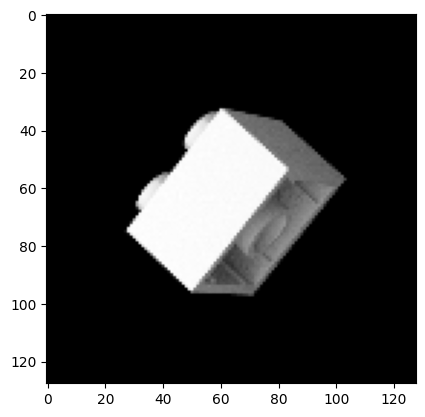

In [25]:
# use plt.imshow() to view a few of the grayscale images

plt.imshow(images[10], cmap='gray')

In [30]:
# Sample target_dict mapping string labels to integers
target_dict = {'brick': 0, 'plate': 1}

# Sample string labels
string_labels = ['brick', 'brick', 'brick', 'plate', 'plate', 'plate']

# Convert string labels to integers using the target_dict
labels_int = [target_dict[label] for label in string_labels]

print("Original labels:", string_labels)
print("Encoded labels:", labels_int) # use the target_dict to convert the string labels to an array of integers


Original labels: ['brick', 'brick', 'brick', 'plate', 'plate', 'plate']
Encoded labels: [0, 0, 0, 1, 1, 1]


**Answer the following questions briefly**

1. Why do you convert all the images to same dimensions?
2. Why do you reshape the images?
3. Based on the images and labels obtained after all of the above preprocessing steps, how many neurons will be created in the input and output layers for the fully linked network that you will construct in Lab 2 - Part 2?






**Why do you convert all the images to same dimensions?**


For consistency in model input, images are downsized to the same dimensions, meeting model architectural requirements,decreasing complexity, enabling efficient processing, ensuring uniform feature learning, and improving memory and storage efficiency.
It also conforms to pre-trained model expectations and helps batch processing.

**Why do you reshape the images?**


To maintain a consistent input format for machine learning models, pictures are reshaped. For neural networks to analyse images consistently and similarly, it is a crucial preprocessing step. Images are reshaped into a format that is consistent with the model's expectations, enabling effective training and guaranteeing that the model can successfully learn features from the data.

**Based on the images and labels obtained after all of the above preprocessing steps, how many neurons will be created in the input and output layers for the fully linked network that you will construct in Lab 2 - Part 2?**

input = 784 Neurons


output = 10 Neurons